In [1]:
import healthcareai

In [2]:
df = healthcareai.load_diabetes()
df

,PatientEncounterID,PatientID,SystolicBPNBR,LDLNBR,A1CNBR,GenderFLG,ThirtyDayReadmitFLG
0,1,10001,167.0,195.0,4.2,M,N
1,2,10001,153.0,214.0,5.0,M,N
2,3,10001,170.0,191.0,4.0,M,N
3,4,10002,187.0,135.0,4.4,M,N
4,5,10002,188.0,125.0,4.3,M,N
5,6,10002,185.0,178.0,5.0,M,N
6,7,10002,189.0,101.0,4.0,M,N
7,8,10003,149.0,160.0,5.0,M,N
8,9,10003,155.0,144.0,6.6,M,N
9,10,10003,160.0,130.0,8.0,M,Y


In [4]:
classification_trainer = healthcareai.SupervisedModelTrainer(
    dataframe=df,
    predicted_column='ThirtyDayReadmitFLG',
    model_type='classification',
    grain_column='PatientEncounterID',
    impute=True,
    verbose=False)

Percentage Imputed: 0.82%
Note: Impute will always happen on prediction dataframe, otherwise rows are dropped, and will lead to missing predictions


Training: Knn , Type: classification
KNN Grid: {'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'weights': ['uniform', 'distance']}
KNeighborsClassifier Training Results:
- Training time:
    Trained the KNeighborsClassifier model in 0.52 seconds
- Best hyperparameters found were:
    {'weights': 'distance', 'n_neighbors': 14}
- KNeighborsClassifier performance metrics:
    Accuracy: 0.86
    ROC AUC: 0.85
    PR AUC: 0.60
Training: Logistic Regression , Type: classification
LogisticRegression Training Results:
- Training time:
    Trained the LogisticRegression model in 0.04 seconds
- Best hyperparameters found were:
    N/A: No hyperparameter search was performed
- LogisticRegression performance metrics:
    Accuracy: 0.83
    ROC AUC: 0.79
    PR AUC: 0.59
Training: Random Forest Classification , Type: classification


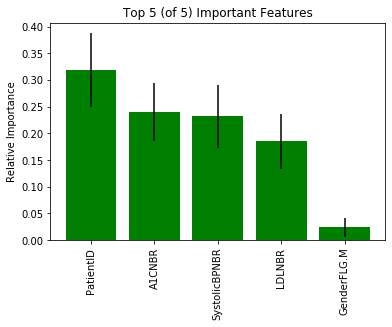

RandomForestClassifier Training Results:
- Training time:
    Trained the RandomForestClassifier model in 8.89 seconds
- Best hyperparameters found were:
    {'n_estimators': 100, 'max_features': 2}
- RandomForestClassifier performance metrics:
    Accuracy: 0.94
    ROC AUC: 0.94
    PR AUC: 0.88


In [5]:
trained_knn = classification_trainer.knn()

# Train a logistic regression model
trained_lr = classification_trainer.logistic_regression()

# Train a random forest model and view the feature importance plot
trained_random_forest = classification_trainer.random_forest(save_plot=False)

In [6]:
print(trained_knn.metrics)

# Print the ROC thresholds
trained_knn.roc()

# Print the PR thresholds
trained_knn.pr()

{'accuracy': 0.86, 'roc_auc': 0.8493921248412266, 'best_roc_cutoff': 0.322969033148717, 'best_true_positive_rate': 0.7575757575757576, 'best_false_positive_rate': 0.11377245508982035, 'true_positive_rates': array([0.        , 0.06060606, 0.12121212, 0.12121212, 0.21212121,
       0.21212121, 0.33333333, 0.33333333, 0.39393939, 0.39393939,
       0.51515152, 0.51515152, 0.54545455, 0.54545455, 0.60606061,
       0.60606061, 0.63636364, 0.63636364, 0.66666667, 0.66666667,
       0.75757576, 0.75757576, 0.78787879, 0.78787879, 0.81818182,
       0.81818182, 0.84848485, 0.84848485, 0.87878788, 0.87878788,
       0.90909091, 0.90909091, 0.93939394, 0.93939394, 1.        ]), 'false_positive_rates': array([0.        , 0.        , 0.        , 0.00598802, 0.00598802,
       0.03592814, 0.03592814, 0.04191617, 0.04191617, 0.05988024,
       0.05988024, 0.07185629, 0.07185629, 0.07784431, 0.07784431,
       0.08383234, 0.08383234, 0.10778443, 0.10778443, 0.11377246,
       0.11377246, 0.20958084,

{'pr_auc': 0.5974315237687635,
 'best_pr_cutoff': 0.322969033148717,
 'best_precision': 0.5681818181818182,
 'best_recall': 0.7575757575757576,
 'pr_thresholds': array([0.        , 0.00375171, 0.00536661, 0.02202169, 0.02439478,
        0.02512682, 0.02793376, 0.02920305, 0.03508727, 0.03558417,
        0.03803555, 0.03811802, 0.03845549, 0.03855717, 0.04019555,
        0.04076274, 0.04286801, 0.04538772, 0.04702325, 0.04930179,
        0.05568508, 0.06178638, 0.06267482, 0.0635644 , 0.06440737,
        0.06475765, 0.06504432, 0.06515132, 0.0676983 , 0.06912369,
        0.08040905, 0.08482644, 0.08653544, 0.09957798, 0.10063934,
        0.10068961, 0.10758432, 0.10780999, 0.10829526, 0.10855242,
        0.11089277, 0.11214094, 0.11475782, 0.115581  , 0.11729372,
        0.11902013, 0.13123057, 0.13254529, 0.13390151, 0.13415022,
        0.14601443, 0.14662113, 0.14719893, 0.14963836, 0.15531431,
        0.16533214, 0.16685113, 0.17078913, 0.17392751, 0.18249228,
        0.18327938, 0.1

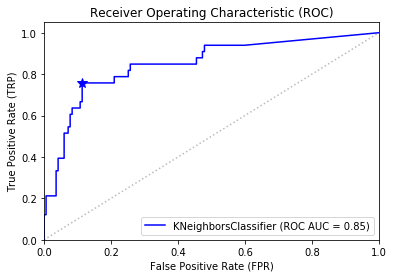

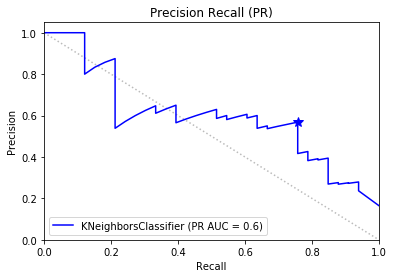

In [7]:
trained_knn.roc_plot()
trained_knn.pr_plot()

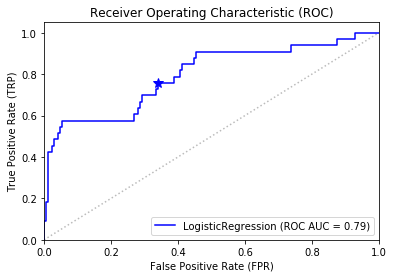

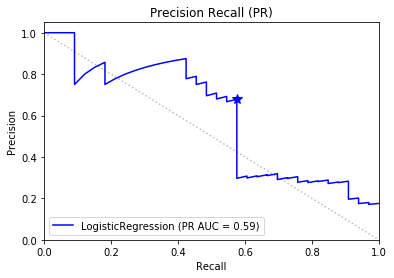

In [8]:
trained_lr.roc_plot()
trained_lr.pr_plot()

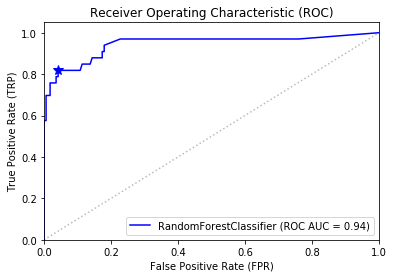

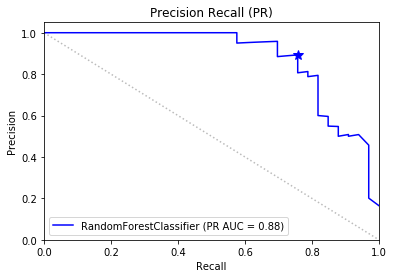

In [9]:
trained_random_forest.roc_plot()
trained_random_forest.pr_plot()

In [11]:
trained_random_forest.save()

Trained RandomForestClassifier model saved as 2020-02-22T19-17-50_classification_RandomForestClassifier.pkl


In [1]:
from sklearn.externals import joblib

/home/uzair/.local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
